In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
file_path = 'oasis_cross-sectional.csv'

df = pd.read_csv(file_path)

In [3]:
df.head(20)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [4]:
df.info

<bound method DataFrame.info of                 ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
431    2.0  
432   40.0  
433   89.0  
434    2.0  
435   39.0  

[436 rows x 12 columns]>

In [5]:
df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [6]:
df.info

<bound method DataFrame.info of                 ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
431    2.0  
432   40.0  
433   89.0  
434    2.0  
435   39.0  

[436 rows x 12 columns]>

In [7]:
print(df)

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3      NaN 

In [8]:
print(df.isnull().sum())

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [9]:

df = df.dropna(subset=['Educ', 'SES','MMSE','CDR'])

In [10]:
print(df)

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
8    OAS1_0010_MR1   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073   
9    OAS1_0011_MR1   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
411  OAS1_0453_MR1   F    R   70   1.0  4.0  29.0  0.5  1295  0.748  1.355   
412  OAS1_0454_MR1   F    R   73   3.0  2.0  23.0  0.5  1536  0.730  1.142   
413  OAS1_0455_MR1   F    R   61   2.0  4.0  28.0  0.0  1354  0.825  1.297   
414  OAS1_0456_MR1   M    R   61   5.0  2.0  30.0  0.0  1637  0.780  1.072   
415  OAS1_0457_MR1   F    R   62   3.0  3.0  26.0  0.0  1372  0.766  1.279   

     Delay  
0      NaN  
1      NaN  
2      NaN  
8      NaN 

In [11]:
df = df.drop('Delay', axis=1)

In [12]:
df= df.drop('ID', axis=1)
df= df.drop('Hand', axis=1)
df= df.drop('M/F', axis=1)

In [13]:
df21=df

In [14]:
print(df)

     Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0     74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1     55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2     73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8     74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9     52   3.0  2.0  30.0  0.0  1321  0.827  1.329
..   ...   ...  ...   ...  ...   ...    ...    ...
411   70   1.0  4.0  29.0  0.5  1295  0.748  1.355
412   73   3.0  2.0  23.0  0.5  1536  0.730  1.142
413   61   2.0  4.0  28.0  0.0  1354  0.825  1.297
414   61   5.0  2.0  30.0  0.0  1637  0.780  1.072
415   62   3.0  3.0  26.0  0.0  1372  0.766  1.279

[216 rows x 8 columns]


In [15]:
import pandas as pd


correlation_of_matrix = df.corr()


print(correlation_of_matrix)

           Age      Educ       SES      MMSE       CDR      eTIV      nWBV  \
Age   1.000000 -0.206650  0.157806 -0.310579  0.310571  0.038419 -0.735933   
Educ -0.206650  1.000000 -0.742361  0.298136 -0.233157  0.166223  0.171876   
SES   0.157806 -0.742361  1.000000 -0.258882  0.198240 -0.184533 -0.118403   
MMSE -0.310579  0.298136 -0.258882  1.000000 -0.775791 -0.010140  0.480587   
CDR   0.310571 -0.233157  0.198240 -0.775791  1.000000  0.113593 -0.499226   
eTIV  0.038419  0.166223 -0.184533 -0.010140  0.113593  1.000000 -0.214031   
nWBV -0.735933  0.171876 -0.118403  0.480587 -0.499226 -0.214031  1.000000   
ASF  -0.034442 -0.143056  0.167573  0.019879 -0.124387 -0.989518  0.217107   

           ASF  
Age  -0.034442  
Educ -0.143056  
SES   0.167573  
MMSE  0.019879  
CDR  -0.124387  
eTIV -0.989518  
nWBV  0.217107  
ASF   1.000000  


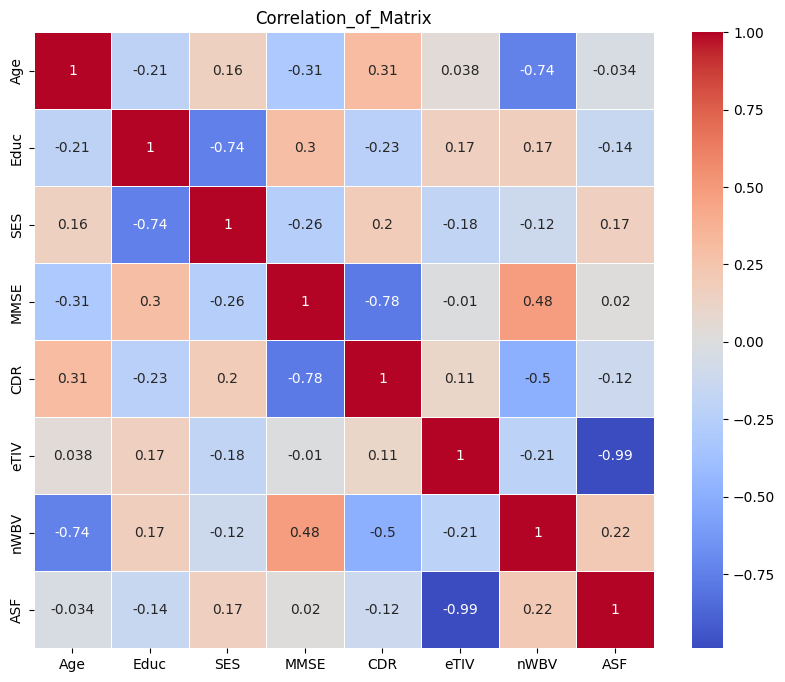

In [16]:


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_of_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_of_Matrix')
plt.show()

# Standardization

In [17]:
print(df)

     Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0     74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1     55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2     73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8     74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9     52   3.0  2.0  30.0  0.0  1321  0.827  1.329
..   ...   ...  ...   ...  ...   ...    ...    ...
411   70   1.0  4.0  29.0  0.5  1295  0.748  1.355
412   73   3.0  2.0  23.0  0.5  1536  0.730  1.142
413   61   2.0  4.0  28.0  0.0  1354  0.825  1.297
414   61   5.0  2.0  30.0  0.0  1637  0.780  1.072
415   62   3.0  3.0  26.0  0.0  1372  0.766  1.279

[216 rows x 8 columns]


In [18]:
# #import pandas as pd
# #from sklearn.preprocessing import StandardScaler

# columns_to_standardize = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

# # Create a object for StandardScaler
# scaler = StandardScaler()

# # Standardize the selected columns
# df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [19]:
print(df)

     Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0     74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1     55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2     73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8     74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9     52   3.0  2.0  30.0  0.0  1321  0.827  1.329
..   ...   ...  ...   ...  ...   ...    ...    ...
411   70   1.0  4.0  29.0  0.5  1295  0.748  1.355
412   73   3.0  2.0  23.0  0.5  1536  0.730  1.142
413   61   2.0  4.0  28.0  0.0  1354  0.825  1.297
414   61   5.0  2.0  30.0  0.0  1637  0.780  1.072
415   62   3.0  3.0  26.0  0.0  1372  0.766  1.279

[216 rows x 8 columns]


In [20]:

correlation_of_matrix = df.corr()


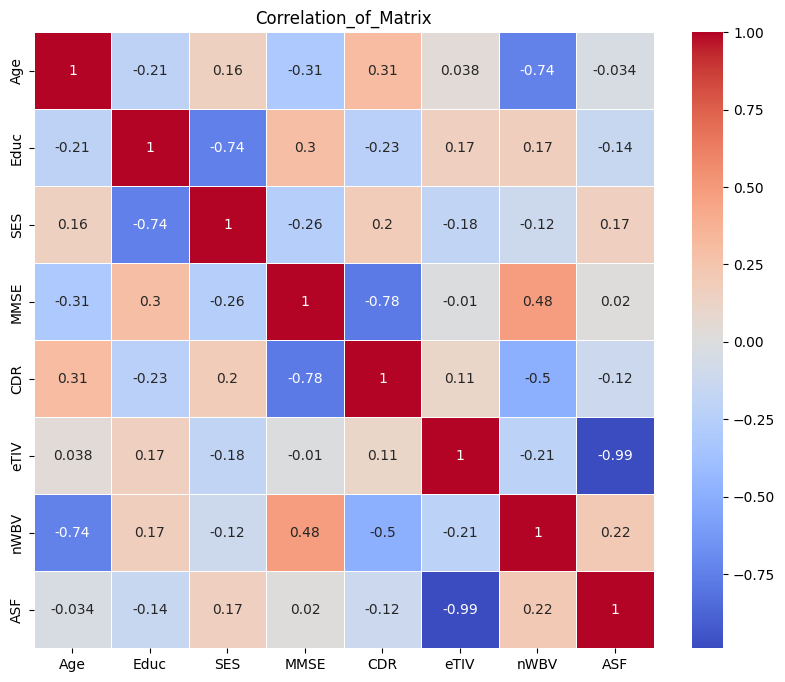

In [21]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_of_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_of_Matrix')
plt.show()

In [22]:
print(df['CDR'])

0      0.0
1      0.0
2      0.5
8      0.0
9      0.0
      ... 
411    0.5
412    0.5
413    0.0
414    0.0
415    0.0
Name: CDR, Length: 216, dtype: float64


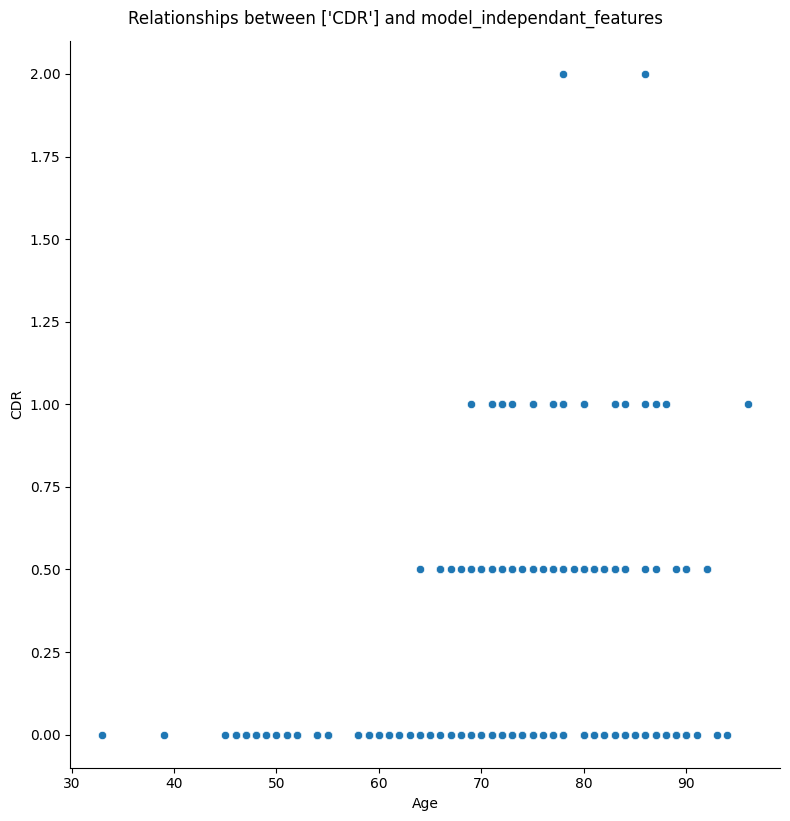

In [23]:
model_independant_features = ['Age']
My_target_variable = ['CDR']

#
sns.pairplot(df, x_vars=model_independant_features, y_vars=My_target_variable, kind='scatter', height=8)
plt.suptitle(f'Relationships between {My_target_variable} and model_independant_features', y=1.02)
plt.show()

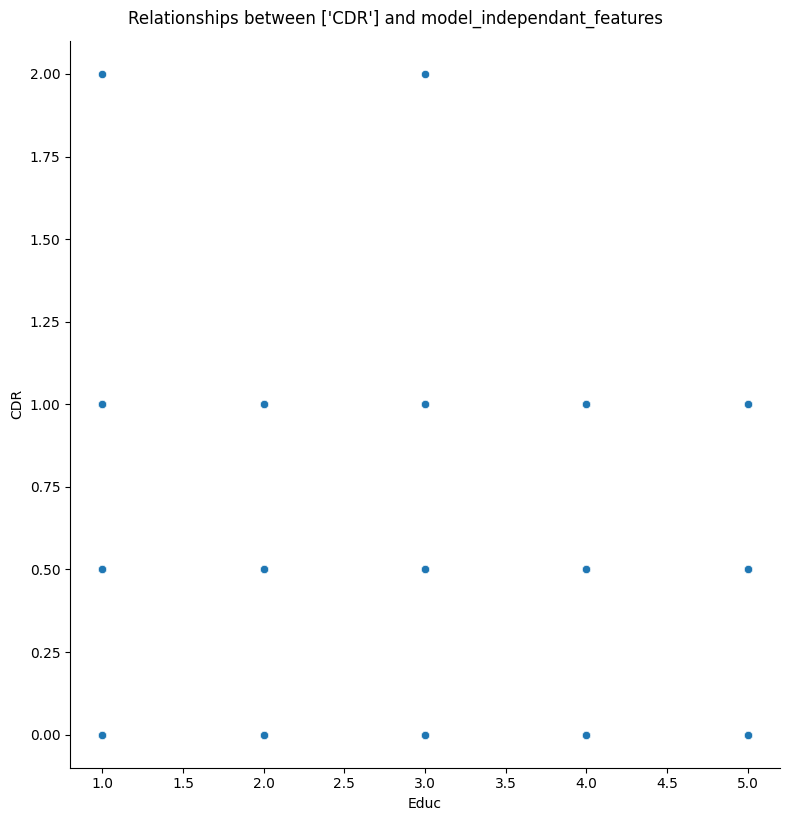

In [24]:
model_independant_features = ['Educ']
My_target_variable = ['CDR']

sns.pairplot(df, x_vars=model_independant_features, y_vars=My_target_variable, kind='scatter', height=8)
plt.suptitle(f'Relationships between {My_target_variable} and model_independant_features', y=1.02)
plt.show()

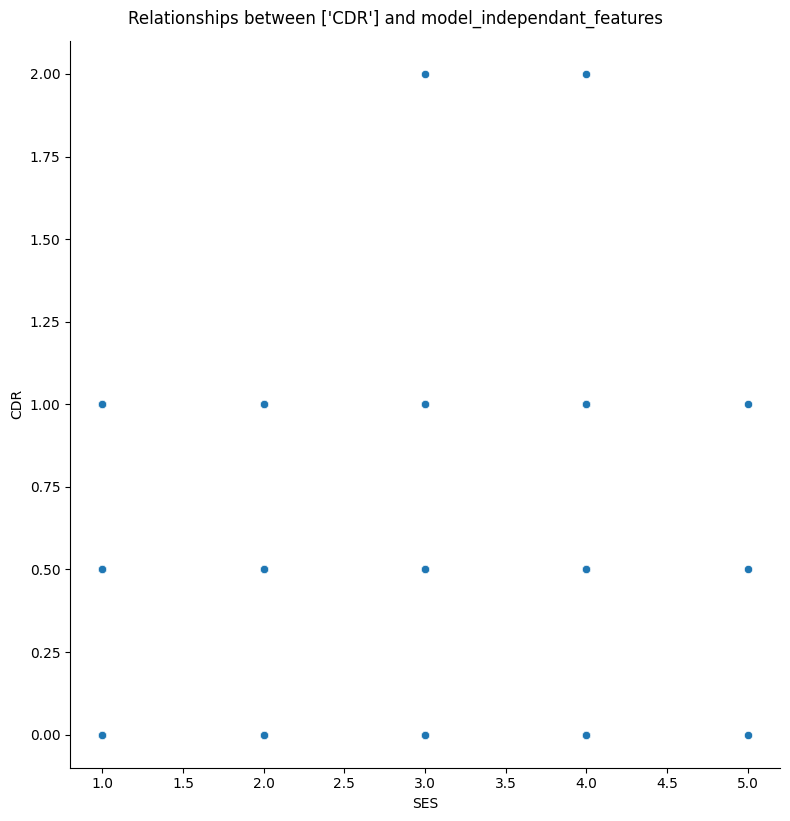

In [25]:
model_independant_features = ['SES']
My_target_variable = ['CDR']

sns.pairplot(df, x_vars=model_independant_features, y_vars=My_target_variable, kind='scatter', height=8)
plt.suptitle(f'Relationships between {My_target_variable} and model_independant_features', y=1.02)
plt.show()

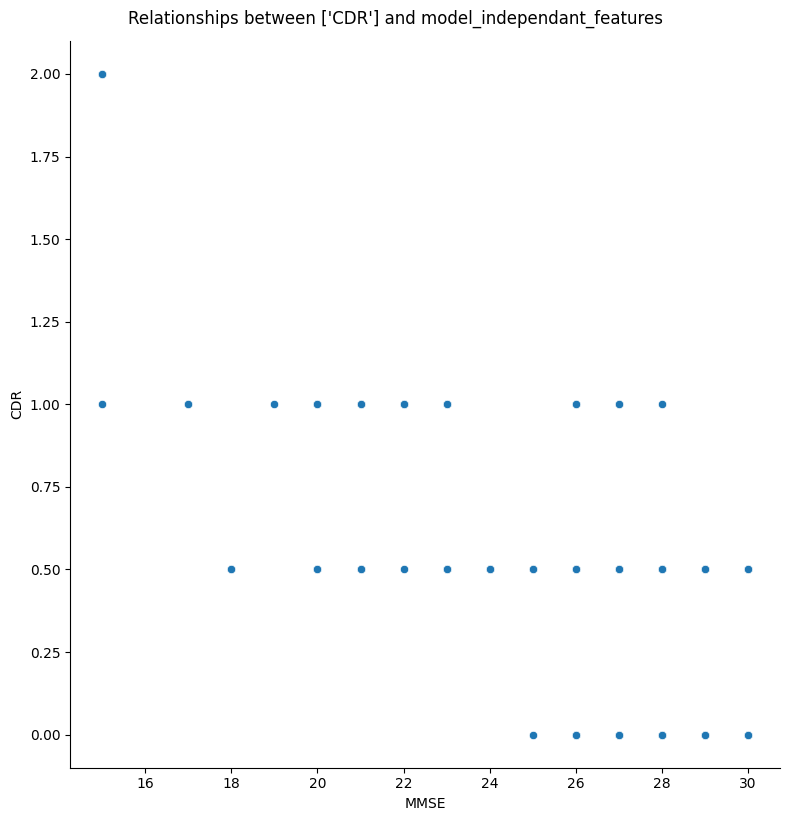

In [26]:
model_independant_features = ['MMSE']
My_target_variable = ['CDR']

sns.pairplot(df, x_vars=model_independant_features, y_vars=My_target_variable, kind='scatter', height=8)
plt.suptitle(f'Relationships between {My_target_variable} and model_independant_features', y=1.02)
plt.show()

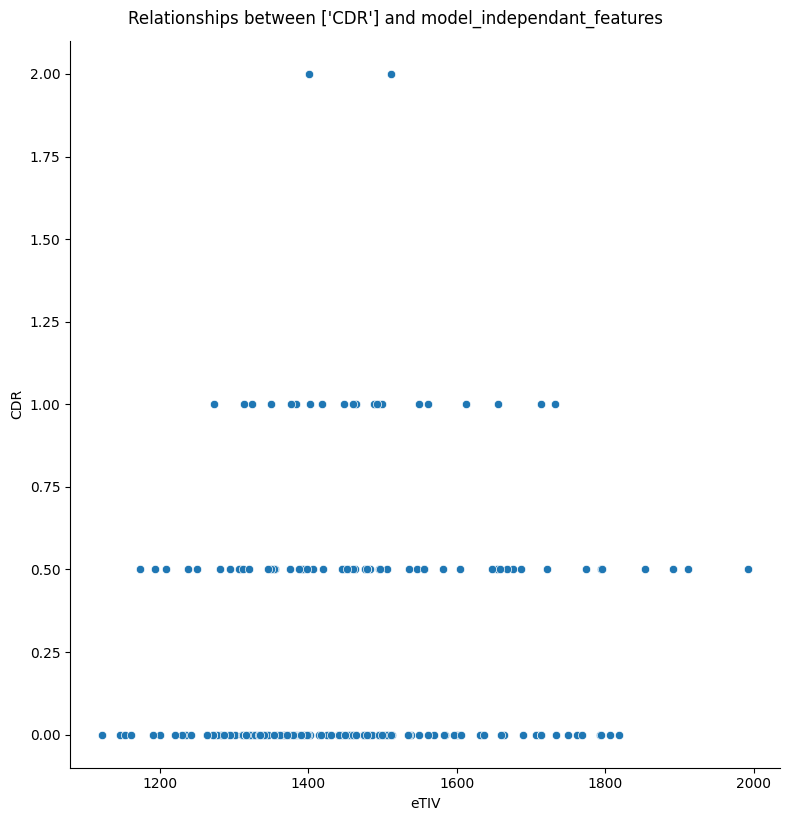

In [27]:
model_independant_features = ['eTIV']
My_target_variable = ['CDR']


sns.pairplot(df, x_vars=model_independant_features, y_vars=My_target_variable, kind='scatter', height=8)
plt.suptitle(f'Relationships between {My_target_variable} and model_independant_features', y=1.02)
plt.show()

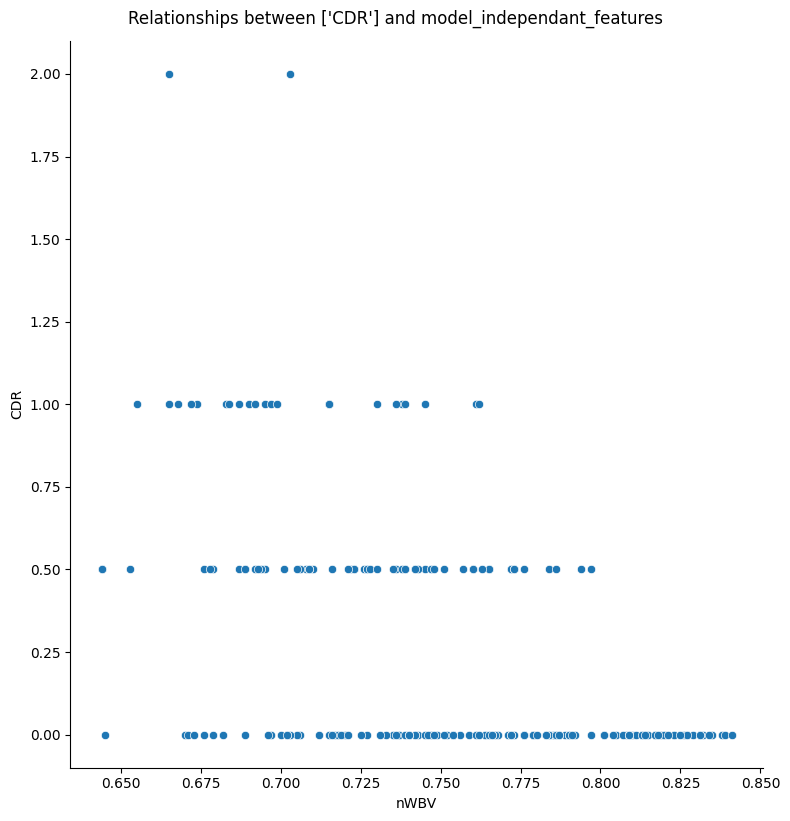

In [28]:
model_independant_features = ['nWBV']
My_target_variable = ['CDR']

sns.pairplot(df, x_vars=model_independant_features, y_vars=My_target_variable, kind='scatter', height=8)
plt.suptitle(f'Relationships between {My_target_variable} and model_independant_features', y=1.02)
plt.show()

In [29]:

Req_input_features = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
My_target_variable_variable = 'CDR'

X = df[Req_input_features]
y = df[My_target_variable_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

PREDICTED_Y = model.predict(X_test)

mse = mean_squared_error(y_test, PREDICTED_Y)
print(f'Mean Squared Error: {mse}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 0.055653812044784215
Coefficients: [-6.92178916e-04 -9.73107774e-03 -1.61656309e-02 -7.61419825e-02
 -4.05442102e-04 -1.66528521e+00 -6.85539853e-01]
Intercept: 5.144922187031627


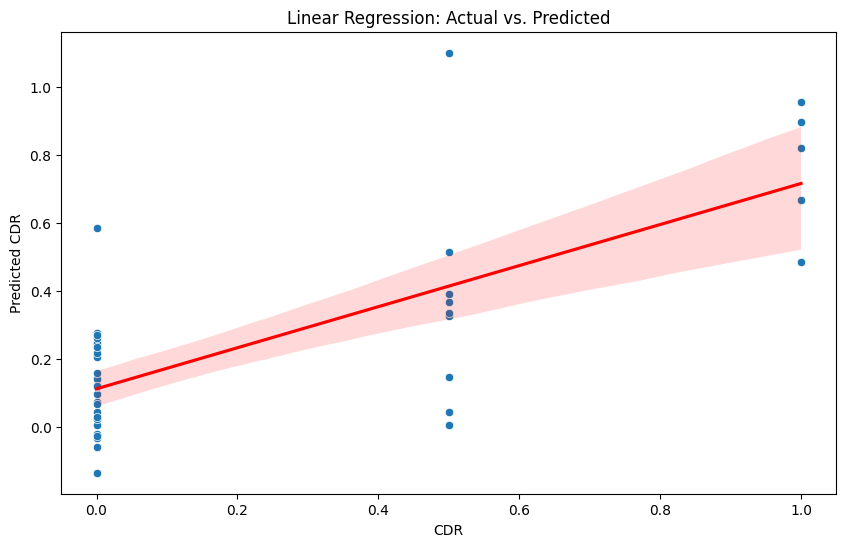

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=PREDICTED_Y)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual CDR')
plt.ylabel('Predicted CDR')


sns.regplot(x=y_test, y=PREDICTED_Y, scatter=False, color='red')

plt.show()


In [31]:
print(PREDICTED_Y)

[ 0.00618749  0.07462499  0.51384778  0.95612877  0.12273496  0.09732179
  0.66817756  0.11732238  0.27583629  0.27532364  0.02840847  0.58473508
  0.14752831  0.07075911  0.24706523  0.07272419  0.06604665  0.14076443
  0.26030948  0.00675596 -0.02206538 -0.13454108 -0.05811547  0.81966534
  0.26878908  0.04334785 -0.03318596  0.48487346  0.04318511  0.3267641
  0.14179008  0.38959492  0.11909388  0.02289062  1.0995316   0.20660094
  0.21769044  0.89474294  0.33592178  0.23446627  0.36673907  0.15707017
 -0.0264085   0.02919168]


In [32]:
print(y_test)

396    0.0
413    0.0
269    0.5
337    1.0
27     0.0
229    0.0
352    1.0
157    0.0
403    0.0
270    0.0
308    0.0
60     0.0
373    0.5
18     0.0
136    0.0
336    0.0
330    0.0
30     0.0
298    0.0
133    0.5
363    0.0
274    0.0
166    0.0
48     1.0
216    0.0
279    0.0
310    0.0
28     1.0
87     0.5
391    0.5
222    0.0
111    0.5
230    0.0
382    0.0
246    0.5
252    0.0
161    0.0
263    1.0
240    0.5
201    0.0
198    0.5
360    0.0
239    0.0
190    0.0
Name: CDR, dtype: float64


In [33]:
df.info

<bound method DataFrame.info of      Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0     74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1     55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2     73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8     74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9     52   3.0  2.0  30.0  0.0  1321  0.827  1.329
..   ...   ...  ...   ...  ...   ...    ...    ...
411   70   1.0  4.0  29.0  0.5  1295  0.748  1.355
412   73   3.0  2.0  23.0  0.5  1536  0.730  1.142
413   61   2.0  4.0  28.0  0.0  1354  0.825  1.297
414   61   5.0  2.0  30.0  0.0  1637  0.780  1.072
415   62   3.0  3.0  26.0  0.0  1372  0.766  1.279

[216 rows x 8 columns]>

In [34]:
df.head(216)

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...
411,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [35]:
print(df21)


     Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0     74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1     55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2     73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8     74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9     52   3.0  2.0  30.0  0.0  1321  0.827  1.329
..   ...   ...  ...   ...  ...   ...    ...    ...
411   70   1.0  4.0  29.0  0.5  1295  0.748  1.355
412   73   3.0  2.0  23.0  0.5  1536  0.730  1.142
413   61   2.0  4.0  28.0  0.0  1354  0.825  1.297
414   61   5.0  2.0  30.0  0.0  1637  0.780  1.072
415   62   3.0  3.0  26.0  0.0  1372  0.766  1.279

[216 rows x 8 columns]


In [36]:
print(y)

0      0.0
1      0.0
2      0.5
8      0.0
9      0.0
      ... 
411    0.5
412    0.5
413    0.0
414    0.0
415    0.0
Name: CDR, Length: 216, dtype: float64


In [37]:

MODEL_Req_input_features = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

X = df21[MODEL_Req_input_features]
y=((df21['CDR']==0)*1| (df21['CDR']==0.5)*2 |(df21['CDR']>=1)*3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

my_classification_object= DecisionTreeClassifier()


my_classification_object.fit(X_train, y_train)


PREDICTED_Y = my_classification_object.predict(X_test)


accuracy_of_model = accuracy_score(y_test, PREDICTED_Y)
classification_report_of_model= classification_report(y_test, PREDICTED_Y)

print(f"accuracy_of_model: {accuracy_of_model:.2f}")
print("classification_report_of_model:\n",classification_report_of_model)

print ('Confusion Matrix :')
print(confusion_matrix(y_test, PREDICTED_Y))

accuracy_of_model: 0.75
classification_report_of_model:
               precision    recall  f1-score   support

           1       0.93      0.83      0.88        30
           2       0.43      0.67      0.52         9
           3       0.67      0.40      0.50         5

    accuracy                           0.75        44
   macro avg       0.67      0.63      0.63        44
weighted avg       0.79      0.75      0.76        44

Confusion Matrix :
[[25  5  0]
 [ 2  6  1]
 [ 0  3  2]]


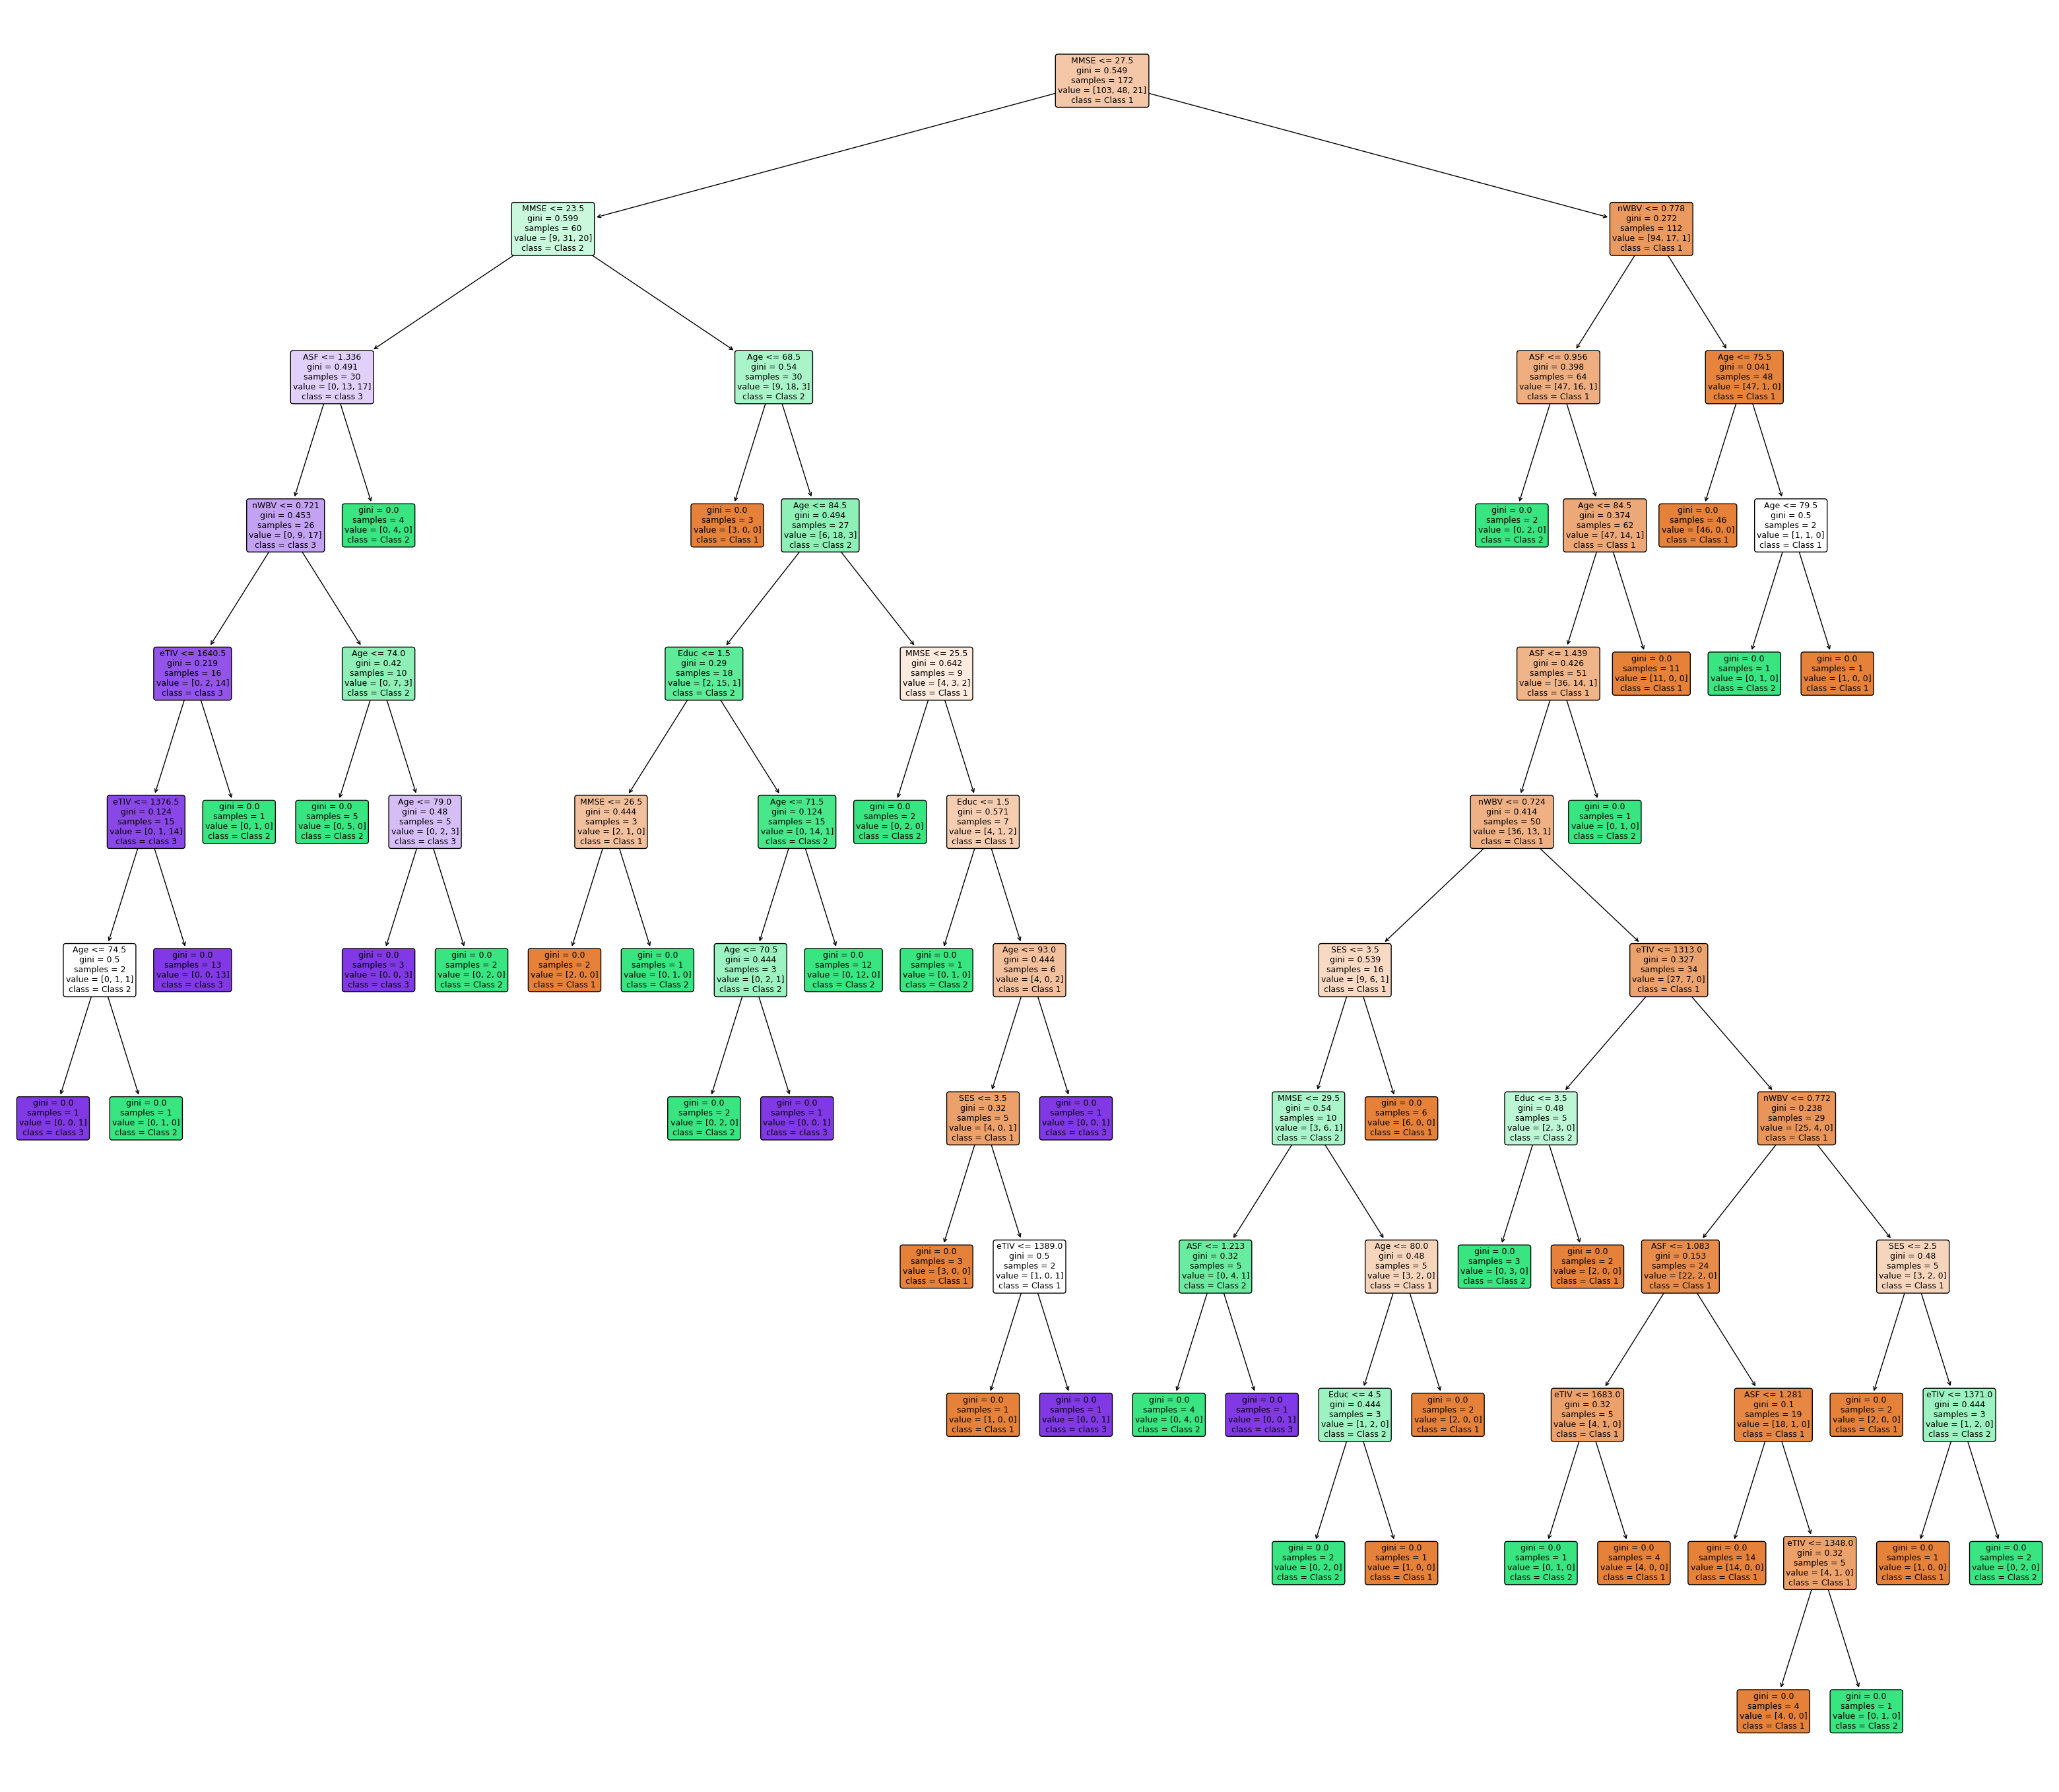

In [38]:

My_features = df[['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
My_target = df['CDR']

plt.figure(figsize=(40, 35))
plot_tree(my_classification_object, filled=True, feature_names=My_features.columns, class_names=['Class 1', 'Class 2','class 3'], rounded=True)
plt.show()